# DNN model for house prices predcitions

In [1]:
import keras
import numpy as np
import pandas as pd

In [2]:
#If you want to import from Drive
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('drive/My Drive/Courses/LearnML/DNN/HousingPrices.csv')
df.head()

Mounted at /content/drive


,YearBuilt,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,YrSold,SalePrice
0,2003,854,1710,2,1,3,8,2008,208500
1,1976,0,1262,2,0,3,6,2007,181500
2,2001,866,1786,2,1,3,6,2008,223500
3,1915,756,1717,1,0,3,7,2006,140000
4,2000,1053,2198,2,1,4,9,2008,250000


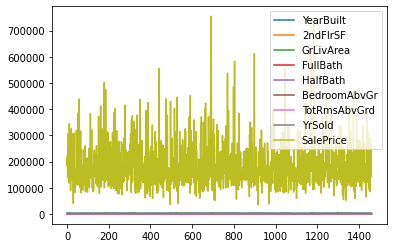

In [5]:
X = df.drop(columns=['SalePrice'])
Y = df[['SalePrice']]
df.plot()

In [6]:
# Set the model
model = keras.models.Sequential()
model.add(keras.layers.Dense(8, activation='relu', input_shape=(8,)))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1)) # The output is single predicted value
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the DNN model
model.fit(X, Y, epochs=30, callbacks=[keras.callbacks.EarlyStopping(patience=3)])

In [9]:
# Test the model
test_data = np.array([2003,	854,	1710,	2,	1,	3,	8,	2008])
print(model.predict(test_data.reshape(1,8), batch_size=1))

[[205839.17]]


In [10]:
# Save th model fro future use
model.save('saved_model.h5')
!ls

drive  sample_data  saved_model.h5


In [11]:
old_model = keras.models.load_model('saved_model.h5')
test_data = np.array([2003,	854,	1710,	2,	1,	3,	8,	2008])
print(old_model.predict(test_data.reshape(1,8), batch_size=1))

[[205839.17]]
